# Movie Correlation Projet

### In this project I analysed a data set on the Movie Industry, including three decades of movie data (1986-2016) and sought for answers to five questions:

### 1. Which movie did earn the most money?

### 2. Does a higher movie budget affect its higher earnings?

### 3. Which movie company invests the most in film?

### 4. Which movie company makes the most money?

### 5. Which movie feature is highly correlated with the movie's earnings (gross column)?

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import  matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8) # Adjusts the configuration of plots we will create

In [2]:
# Read in the data

df = pd.read_csv(r'C:\Users\djuki\Documents\Projet Data Analyst\Movie Correlation - Python\movies.csv')

In [3]:
# Look at the data (first 5 rows)

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Basic information about our data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
# See if there is any missing data (total number and percentage of missing data per column)

print(f"Number of NaN values out of {df.shape[0]} rows per column")
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count() * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Number of NaN values out of 7668 rows per column


,Total,Percent
budget,2171,28.312467
gross,189,2.464789
rating,77,1.004173
company,17,0.221701
runtime,4,0.052165
score,3,0.039124
votes,3,0.039124
writer,3,0.039124
country,3,0.039124
released,2,0.026082


#### We can clearly see that there are 11 columns which contain NaN values. There are several different ways in which we can address this issue. 

#### For example:

#### - Based on column type we could compute a MEAN/MEDIAN/MODE of the column and replace each NaN value with it.

#### - Based on column type we could replace each NaN value with a CONSTANT.

#### - Based on column type we can DROP each row contianing NaN values.

#### I've decided to go with third approach (DROP). 


In [6]:
# Drop each row contianing NaN values

df.dropna(inplace=True)
df.shape

(5421, 15)

In [7]:
# Drop any duplicates

df.drop_duplicates()
df.shape

(5421, 15)

#### We can see that our dataframe doesn't have the duplicate values.

In [8]:
# Sort data by gross

df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000.0,5.073000e+03,Two Prong Lesson,96.0
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000.0,2.970000e+03,Trimark Pictures,97.0
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000.0,2.554000e+03,Copperheart Entertainment,108.0
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000.0,2.270000e+03,Embassy Pictures,85.0


### We can see that Avatar is the film which earned the most (2,8 billion dollars).

In [9]:
# Table scrolling option 

pd.set_option('display.max_rows', None)

#### I start from a hypothesis that the higher film budget affects the higher film earnings.

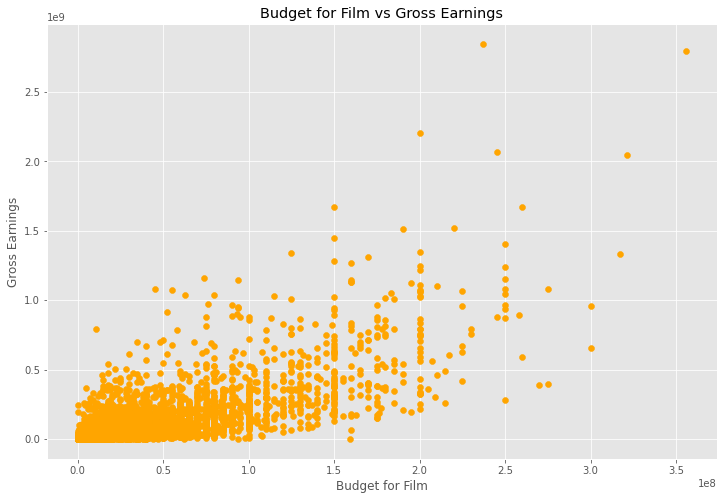

In [10]:
# Scatter plot budget vs gross using matplotlib

plt.scatter(x=df['budget'], y=df['gross'], color='orange')
plt.title('Budget for Film vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

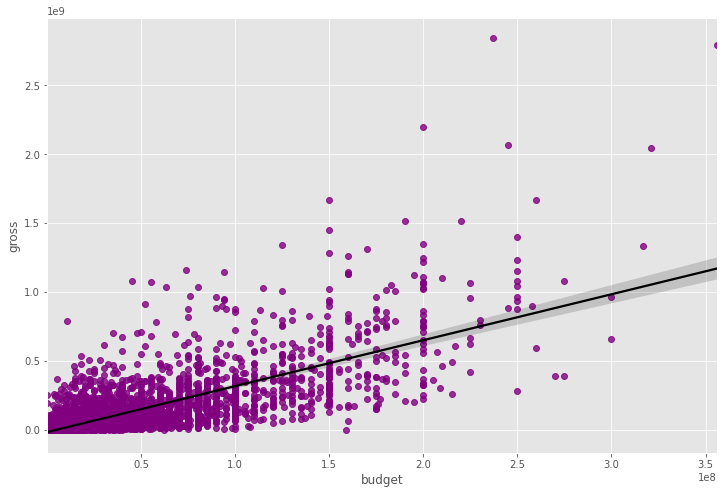

In [11]:
# Reg plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'purple'}, line_kws={'color':'black'})

### Different plots above show that my hypothesis (the higher film budget affects the higher film earnings) is correct . :-)

#### Top five companies with the largest total budget

In [12]:
# Looking at the top 5 companies by budget

df_cb_sum = df.groupby('company')[['budget']].sum()
df_cb_sum_sort = df_cb_sum.sort_values('budget', ascending = False)[:5]
df_cb_sum_sort = df_cb_sum_sort['budget'].astype('int64')
df_cb_sum_sort

company
Warner Bros.             19503300000
Universal Pictures       15989730001
Columbia Pictures        15512107000
Paramount Pictures       13723450000
Twentieth Century Fox    11474600000
Name: budget, dtype: int64

<AxesSubplot:title={'center':'Top 5 movie companies by budget'}, xlabel='company', ylabel='budget'>

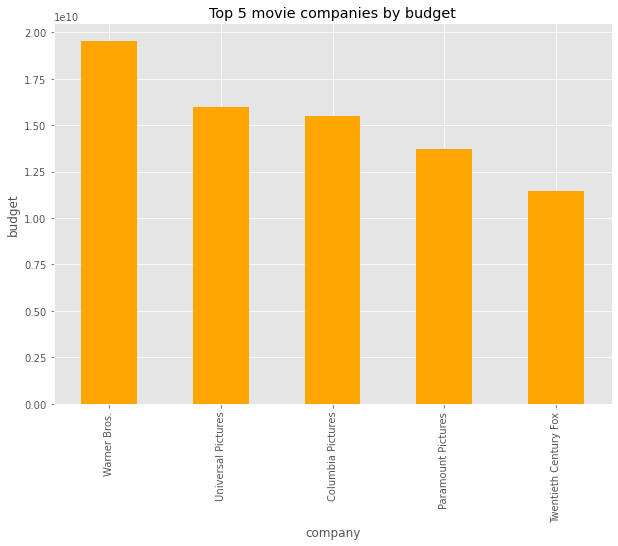

In [13]:
# Bar plot

df_cb_sum_sort.plot(
    kind='bar',
    color='orange',
    x='company',
    ylabel='budget',
    title='Top 5 movie companies by budget',
    figsize=(10, 7)
)

### Warner Bros is the film company with the highest total budget (19.5 billion dollars).

#### The top five movie companies with the largest gross revenue.

In [14]:
# Looking at the top 5 companies by gross revenue

df_cgr_sum = df.groupby('company')[['gross']].sum()
df_cgr_sum_sort = df_cgr_sum.sort_values('gross', ascending = False)[:5]
df_cgr_sum_sort = df_cgr_sum_sort['gross'].astype('int64')
df_cgr_sum_sort

company
Warner Bros.             54610959970
Universal Pictures       51241105418
Columbia Pictures        42356430218
Paramount Pictures       40021704691
Twentieth Century Fox    39542573303
Name: gross, dtype: int64

<AxesSubplot:title={'center':'Top 5 movie companies by gross revenue'}, xlabel='company', ylabel='gross revenue'>

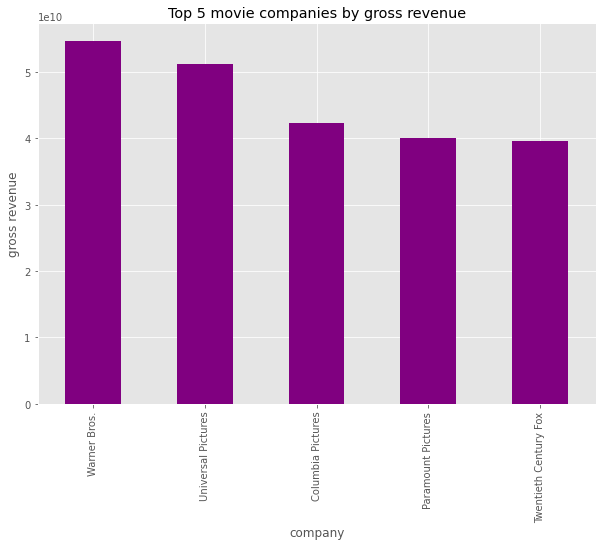

In [15]:
# Bar plot

df_cgr_sum_sort.plot(
    kind='bar',
    color='purple',
    x='company',
    ylabel='gross revenue',
    title='Top 5 movie companies by gross revenue',
    figsize=(10, 7)
)

### Warner Bros is also the film company with the highest total gross revenue (54.6 billion dollars).
### It's interesting that the first five companies with the largest total budget are also the companies with the largest total gross earnings.

#### Let's have a look at the correlation.

#### First, we need to transform all object data to categorical data.

In [16]:
# Change object data to categorical data

df_numerized = df
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000.0,46998772.0,1426,146.0
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000.0,58853106.0,452,104.0
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000.0,538375067.0,945,124.0
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000.0,83453539.0,1108,88.0
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000.0,39846344.0,1083,98.0


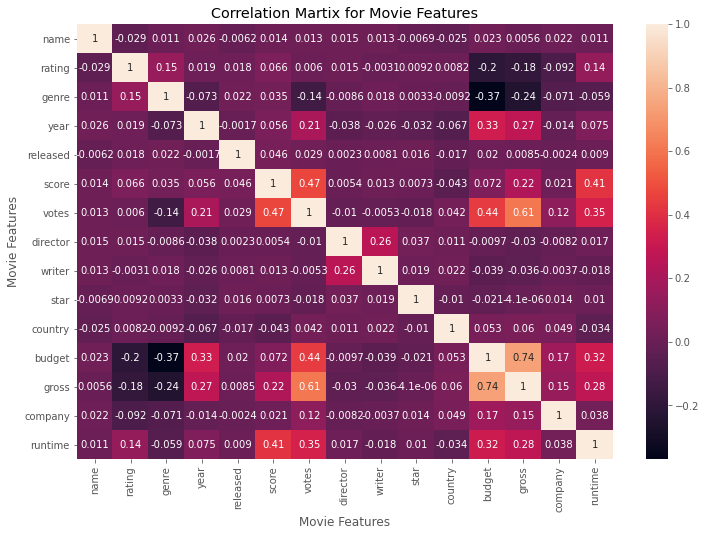

In [21]:
# Correlation matrix

correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Martix for Movie Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

### Correlation matrix above shows us that votes and budget have the hightest correlation to gross earnings (votes / gross = 0.61 and budget / gross = 0.74).

In [18]:
# Correlation matrix

df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975
score,0.014450,0.065983,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068
votes,0.012615,0.006031,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303
director,0.015246,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433
writer,0.012880,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561
star,-0.006882,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108


In [22]:
# Show pairs correlation

correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name      name        1.000000
          rating     -0.029234
          genre       0.010996
          year        0.025542
          released   -0.006152
          score       0.014450
          votes       0.012615
          director    0.015246
          writer      0.012880
          star       -0.006882
          country    -0.025490
          budget      0.023392
          gross       0.005639
          company     0.021697
          runtime     0.010850
rating    name       -0.029234
          rating      1.000000
          genre       0.147796
          year        0.019499
          released    0.018083
          score       0.065983
          votes       0.006031
          director    0.014656
          writer     -0.003149
          star        0.009196
          country     0.008230
          budget     -0.203946
          gross      -0.181906
          company    -0.092357
          runtime     0.140792
genre     name        0.010996
          rating      0.147796
        

In [23]:
# Show pairs correlation higher than 0.5

high_corr_pairs = corr_pairs[(corr_pairs) > 0.5]
high_corr_pairs

name      name        1.000000
rating    rating      1.000000
genre     genre       1.000000
year      year        1.000000
released  released    1.000000
score     score       1.000000
votes     votes       1.000000
          gross       0.614751
director  director    1.000000
writer    writer      1.000000
star      star        1.000000
country   country     1.000000
budget    budget      1.000000
          gross       0.740247
gross     votes       0.614751
          budget      0.740247
          gross       1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

### High correlation pairs above show us that votes and budget have the hightest correlation to gross earnings (votes / gross = 0.61 and budget / gross = 0.74).

### Answers to the questions:

### 1. Avatar is the film which earned the most (2,8 billion dollars).

### 2. The higher budget brings more money to the film.

### 3. Warner Bros is the movie company which invests the most in film (19.5 billion dollars).

### 4. Warner Bros is the company which makes the most money (54.6 billion dollars).

### 5. Votes and budget have the hightest correlation to gross earnings (votes/gross=0.61, budget/gross=0.74).